## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

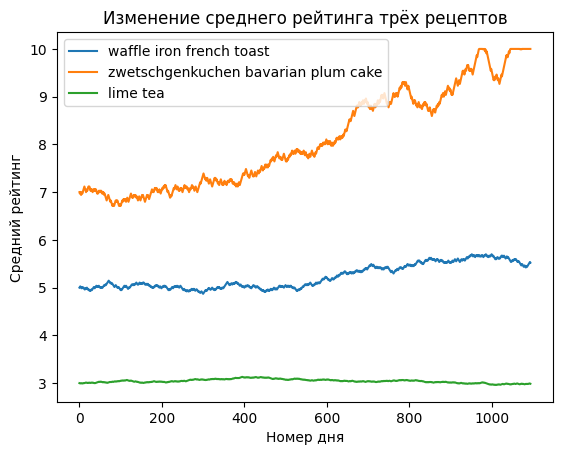

In [3]:
data = np.load("average_ratings.npy") 
recipes = {0: 'waffle iron french toast', 1: 'zwetschgenkuchen bavarian plum cake', 2: 'lime tea'}
for index, name in recipes.items():
    plt.plot(data[index], label=name)

plt.xlabel("Номер дня")
plt.ylabel("Средний рейтинг")
plt.title("Изменение среднего рейтинга трёх рецептов")
plt.legend(loc = "upper left")

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


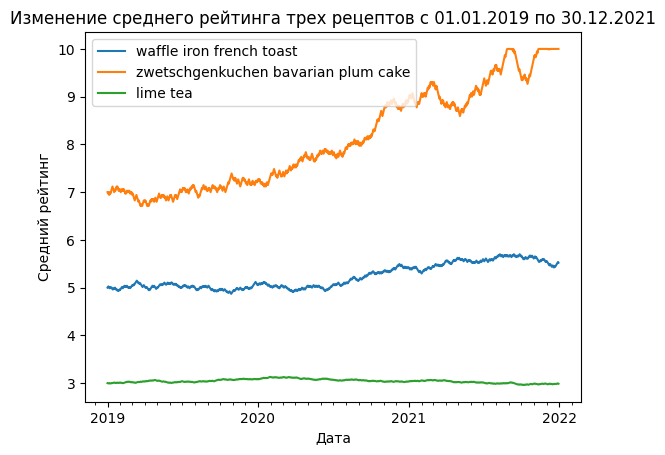

In [4]:
data = np.load("average_ratings.npy") 
recipes = {0: 'waffle iron french toast', 1: 'zwetschgenkuchen bavarian plum cake', 2: 'lime tea'}
date_range = pd.date_range(start="2019-01-01", end="2021-12-30", freq='D')

for index, name in recipes.items():
    plt.plot(date_range, data[index], label=name)

plt.xlabel("Дата")
plt.ylabel("Средний рейтинг")
plt.title("Изменение среднего рейтинга трех рецептов с 01.01.2019 по 30.12.2021")
plt.legend(loc="upper left")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

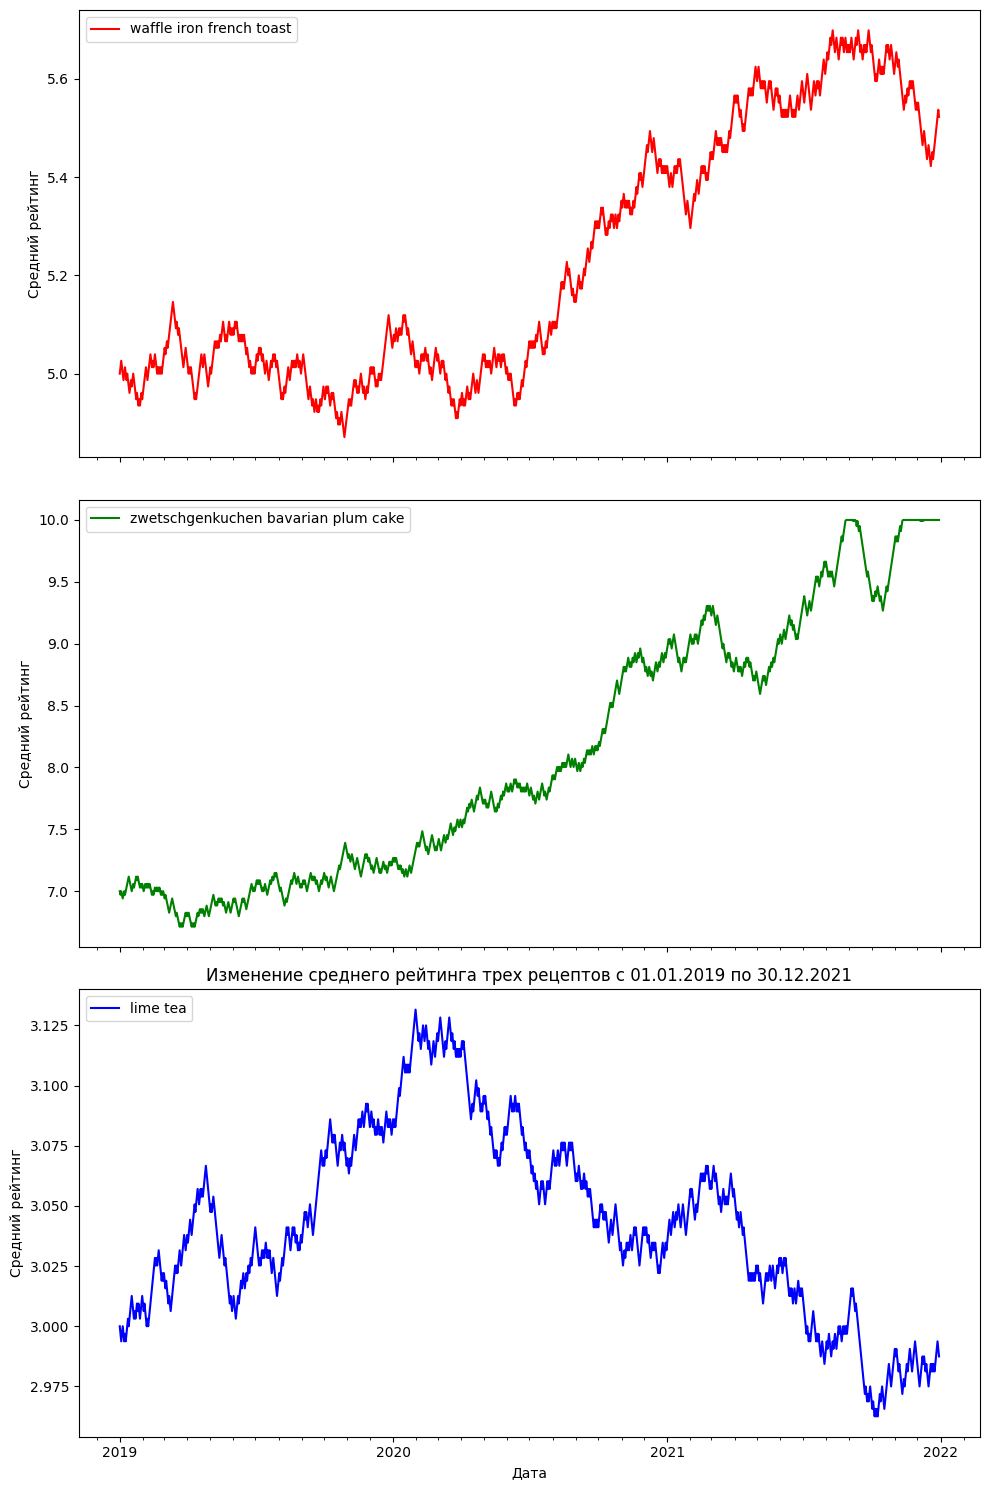

In [9]:
data = np.load("average_ratings.npy")
recipes = {0: 'waffle iron french toast', 1: 'zwetschgenkuchen bavarian plum cake', 2: 'lime tea'}
date_range = pd.date_range(start="2019-01-01", end="2021-12-30", freq='D')

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
colors = ['r','g','b']

for index, name in recipes.items():
    axs[index].plot(date_range, data[index], colors[index], label=name)
    axs[index].set_ylabel("Средний рейтинг")
    axs[index].legend(loc="upper left")

plt.xlabel("Дата")
plt.title("Изменение среднего рейтинга трех рецептов с 01.01.2019 по 30.12.2021")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.tight_layout()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

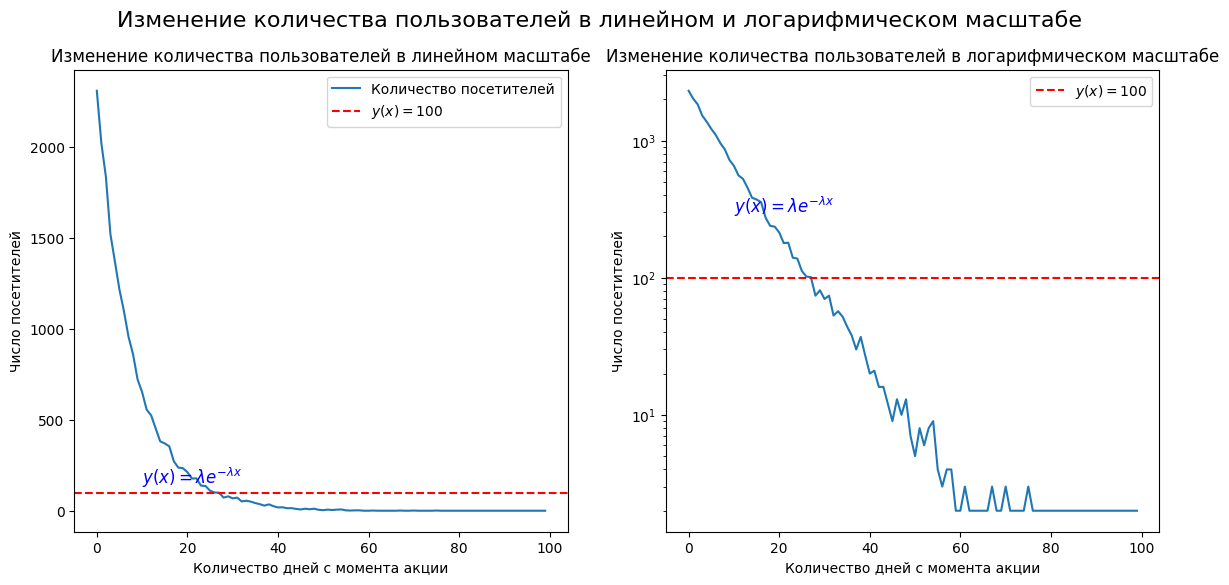

In [17]:
visitors = np.load("visitors.npy")

eq_label = r"$y(x)=\lambda e^{-\lambda x}$"
horizontal_line_label = r"$y(x)=100$"

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(visitors, label="Количество посетителей")
axs[0].axhline(y=100, color='red', linestyle='--', label=horizontal_line_label)
axs[0].set_xlabel("Количество дней с момента акции")
axs[0].set_ylabel("Число посетителей")
axs[0].set_title("Изменение количества пользователей в линейном масштабе")
axs[0].legend()
axs[0].text(10, 150, eq_label, fontsize=12, color='blue')

axs[1].plot(visitors)
axs[1].axhline(y=100, color='red', linestyle='--', label=horizontal_line_label)
axs[1].set_xlabel("Количество дней с момента акции")
axs[1].set_ylabel("Число посетителей")
axs[1].set_title("Изменение количества пользователей в логарифмическом масштабе")
axs[1].set_yscale('log')
axs[1].legend()
axs[1].text(10, 300, eq_label, fontsize=12, color='blue')

plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=16)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [19]:
recipes = pd.read_csv('recipes_sample.csv', delimiter=',', parse_dates=['submitted'])
reviews = pd.read_csv('reviews_sample.csv', delimiter=',', index_col=0, parse_dates=['date'])

((126696, 5), (30000, 8))

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 0.98, 'Анализ рецептов по времени приготовления и количеству шагов')

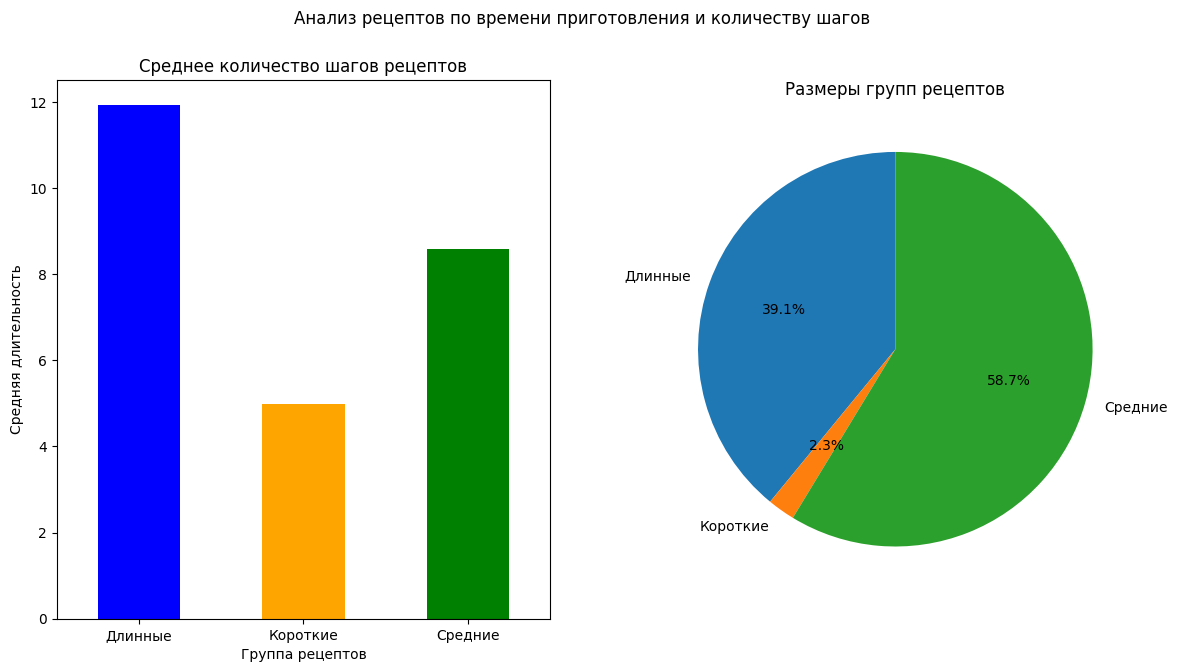

In [21]:
def categorize_recipe(minutes):
    """функция для определения категории рецепта"""
    if minutes < 5:
        return 'Короткие'
    elif 5 <= minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'

# Применение функции для создания нового столбца с категориями
recipes['category'] = recipes['minutes'].apply(categorize_recipe)
# Группировка данных по категориям и расчет средней длительности шагов и размеров групп
grouped = recipes.groupby('category').agg({'n_steps': 'mean', 'category': 'size'}).rename(columns={'category': 'size'})

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Столбчатая диаграмма
grouped['n_steps'].plot(kind='bar', ax=ax[0], color=['blue', 'orange', 'green'])
ax[0].set_title('Среднее количество шагов рецептов')
ax[0].set_xlabel('Группа рецептов')
ax[0].set_ylabel('Средняя длительность')
ax[0].set_xticklabels(grouped.index, rotation=0)

# Круговая диаграмма
grouped['size'].plot(kind='pie', ax=ax[1], labels=grouped.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Размеры групп рецептов')
ax[1].set_ylabel('')  # Убираем метку оси y для круговой диаграммы

plt.suptitle('Анализ рецептов по времени приготовления и количеству шагов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

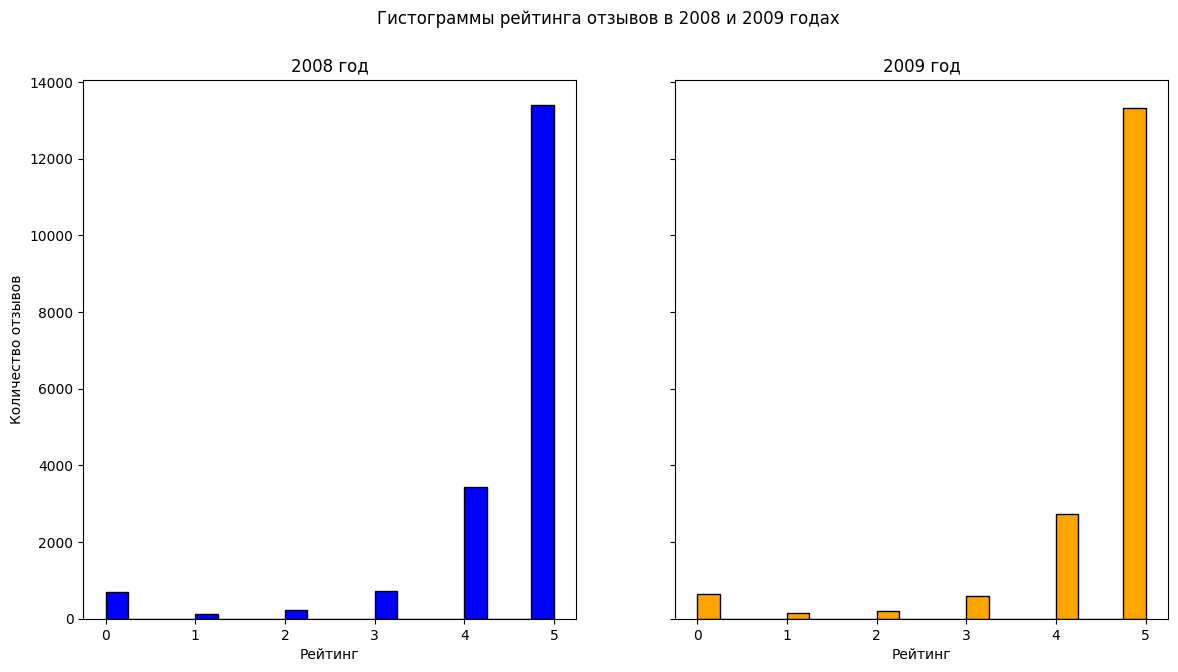

In [22]:
reviews_2008 = reviews[reviews['date'].dt.year == 2008]
reviews_2009 = reviews[reviews['date'].dt.year == 2009]

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

#2008 год
reviews_2008['rating'].plot.hist(ax=axes[0], bins=20, color='blue', edgecolor='black')
axes[0].set_title('2008 год')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Количество отзывов')

#2009 год
reviews_2009['rating'].plot.hist(ax=axes[1], bins=20, color='orange', edgecolor='black')
axes[1].set_title('2009 год')
axes[1].set_xlabel('Рейтинг')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"